## Observations and Insights 

1. Boxplots 
2. Reduction in tumor size with Capomulin
3. Apparent correlation between weight and tumor volume

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = mouse_metadata.merge(study_results, on = "Mouse ID", how = "inner")
# Display the data table for preview
merged_df = merged_df.set_index(["Mouse ID", "Timepoint"])
merged_df

Drug Regimen   Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
k403     0             Ramicane  Male          21          16   
         5             Ramicane  Male          21          16   
         10            Ramicane  Male          21          16   
         15            Ramicane  Male          21          16   
         20            Ramicane  Male          21          16   
...                         ...   ...         ...         ...   
z969     25            Naftisol  Male           9          30   
         30            Naftisol  Male           9          30   
         35            Naftisol  Male           9          30   
         40            Naftisol  Male           9          30   
         45            Naftisol  Male           9          30   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
k403     0                   45.000000                 0  
         5                   38.825898                 0  
         10                  35.014271                 1  
         15                  34.223992                 1  
         20                  32.997729                 1  
...                                ...               ...  
z969     25                  63.145652                 2  
         30                  65.841013                 3  
         35                  69.176246                 4  
         40                  70.314904                 4  
         45                  73.867845                 4  

[1893 rows x 6 columns]

In [2]:
# Checking the number of mice.
n_mouse = len(merged_df.groupby(["Mouse ID"]))
n_mouse

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = merged_df.groupby(["Mouse ID", "Timepoint"]).count()
duplicate_mouse = duplicate_mouse["Drug Regimen"][duplicate_mouse["Drug Regimen"] > 1]
duplicate_mouse = duplicate_mouse.reset_index()
duplicate_mouse = duplicate_mouse["Mouse ID"][0]
print(duplicate_mouse)

g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_info = merged_df.loc[duplicate_mouse]
duplicate_mouse_info


,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,,,
0,Propriva,Female,21,26,45.000000,0
0,Propriva,Female,21,26,45.000000,0
5,Propriva,Female,21,26,48.786801,0
5,Propriva,Female,21,26,47.570392,0
10,Propriva,Female,21,26,51.745156,0
10,Propriva,Female,21,26,49.880528,0
15,Propriva,Female,21,26,51.325852,1
15,Propriva,Female,21,26,53.442020,0
20,Propriva,Female,21,26,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df = merged_df.reset_index()
merged_df = merged_df.set_index("Mouse ID")
cleaned_df = merged_df.drop(index = duplicate_mouse)

cleaned_df = cleaned_df.reset_index()
cleaned_df = cleaned_df.set_index(["Mouse ID", "Timepoint"])

cleaned_df

Drug Regimen   Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
k403     0             Ramicane  Male          21          16   
         5             Ramicane  Male          21          16   
         10            Ramicane  Male          21          16   
         15            Ramicane  Male          21          16   
         20            Ramicane  Male          21          16   
...                         ...   ...         ...         ...   
z969     25            Naftisol  Male           9          30   
         30            Naftisol  Male           9          30   
         35            Naftisol  Male           9          30   
         40            Naftisol  Male           9          30   
         45            Naftisol  Male           9          30   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
k403     0                   45.000000                 0  
         5                   38.825898                 0  
         10                  35.014271                 1  
         15                  34.223992                 1  
         20                  32.997729                 1  
...                                ...               ...  
z969     25                  63.145652                 2  
         30                  65.841013                 3  
         35                  69.176246                 4  
         40                  70.314904                 4  
         45                  73.867845                 4  

[1880 rows x 6 columns]

In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_n_mouse = len(cleaned_df.groupby("Mouse ID").count())
cleaned_n_mouse

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleaned_df = cleaned_df.reset_index()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_DR = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_DR = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_DR = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_DR = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_DR = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_statistics1 = pd.DataFrame({
    "Mean": mean_DR,
    "Median": median_DR,
    "Variance": var_DR,
    "Standard Deviation": std_DR,
    "Standard Error of the Mean": sem_DR
})
summary_statistics1

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_statistics2 = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean = ("mean"),
    Median = ("median"),
    Variance = ("var"),
    Standard_Deviation = ("std"),
    Standard_Error_of_the_Mean = ("sem")
)

summary_statistics2

,Mean,Median,Variance,Standard_Deviation,Standard_Error_of_the_Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

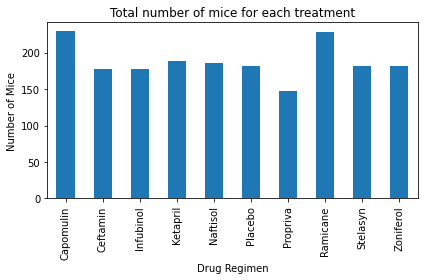

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mice_vs_treatment = cleaned_df.groupby("Drug Regimen")["Mouse ID"].count()
mice_vs_treatment.plot(kind = "bar", title = "Total number of mice for each treatment", ylabel = "Number of Mice")
# mice_vs_treatment
plt.tight_layout()
plt.show()

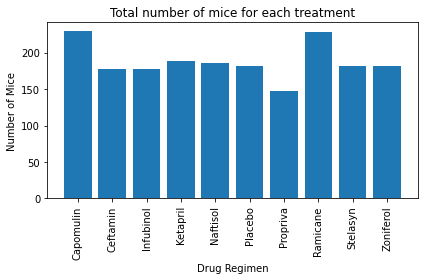

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
y_mice = mice_vs_treatment.to_numpy()
x_drugs = mice_vs_treatment.index
plt.bar(x_drugs, y_mice)
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total number of mice for each treatment")
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Sex distribution'}>

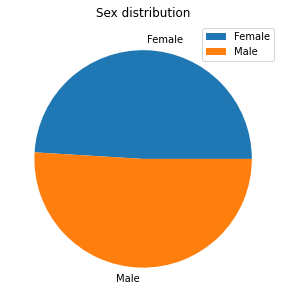

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = cleaned_df.groupby("Sex").count()["Mouse ID"]
mice_sex.plot(kind = 'pie', title = "Sex distribution", ylabel = "", legend = True, figsize = (5, 5))

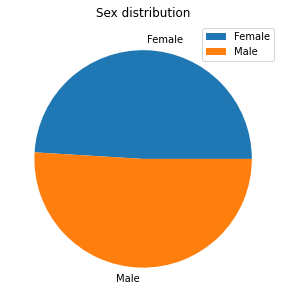

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label_sex = mice_sex.index
size_sex = mice_sex.to_numpy()
plt.pie(size_sex, labels = label_sex)
plt.title("Sex distribution")
plt.legend()
fig0 = plt.gcf()
fig0.set_size_inches(5,5)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# cleaned_df.groupby(["Drug Regimen", "Mouse ID"]).sum()["Tumor Volume (mm3)"]
# filtered_df = cleaned_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]][(cleaned_df["Drug Regimen"] == "Capomulin") | (cleaned_df["Drug Regimen"] == "Ramicane") | (cleaned_df["Drug Regimen"] == "Infubinol") | (cleaned_df["Drug Regimen"] == "Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse
# filtered_df.groupby(["Mouse ID", "Drug Regimen"]).count()
# filtered_df.groupby(["Drug Regimen", "Mouse ID"]).count()
# filtered_df[:][cleaned_df["Mouse ID"] == "w678"]
# filtered_df.groupby(["Mouse ID"]).last()
# filtered_df.set_index(["Mouse ID", "Timepoint"])#.sort_values(by=["Timepoint"], ascending = False)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# filtered_df

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = cleaned_df[:][(cleaned_df["Drug Regimen"] == "Capomulin") | (cleaned_df["Drug Regimen"] == "Ramicane") | (cleaned_df["Drug Regimen"] == "Infubinol") | (cleaned_df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = filtered_df.groupby("Mouse ID").last()

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_timepoint = greatest_timepoint.reset_index()
greatest_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
grouped_drug = greatest_timepoint.groupby("Drug Regimen")

tumor_data = []

# Creating a list of lists
for treatment in treatments:
    tumor_data.append(grouped_drug.get_group(str(treatment))["Tumor Volume (mm3)"])

# print(tumor_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lowerq_list = []
lower_boundarie_list = []
upper_boundarie_list = []
upperq_list = []
iqr_list = []
possible_outliers =[]

# Pablo: This part was done working with lists of lists
for i, tumor_list in enumerate(tumor_data):
    quartiles = tumor_list.quantile([.25, .5, .75])
#     print(quartiles)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lowerq_list.append(lowerq)
    upperq_list.append(upperq)
    iqr_list.append(iqr)
    
    lower_boundarie = lowerq - 1.5 * iqr
    lower_boundarie_list.append(lower_boundarie)
    
    upper_boundarie = upperq + 1.5 * iqr
    upper_boundarie_list.append(upper_boundarie)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    get_group_drug = grouped_drug.get_group(str(treatments[i]))
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    possible_outliers.append(get_group_drug[(get_group_drug["Tumor Volume (mm3)"] <= lower_boundarie) | (get_group_drug["Tumor Volume (mm3)"] >= upper_boundarie)])

# possible_outliers

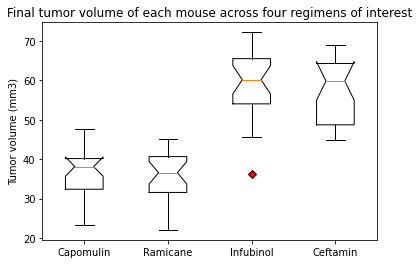

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_df = greatest_timepoint[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]


# for i, treatment in enumerate(treatments):
#     plt.subplot(2,2,i+1)
#     plt.boxplot(box_plot_df["Tumor Volume (mm3)"][box_plot_df["Drug Regimen"] == treatment])
#     plt.ylabel('Tumor Volume (mm3)')
#     plt.ylim(20,80)

# fig2, axs = plt.subplots(2,2)
# for i, ax in enumerate(axs.flat):
#     ax.boxplot(box_plot_df["Tumor Volume (mm3)"][box_plot_df["Drug Regimen"] == treatments[i]])
#     ax.set(xlabel='', ylabel='Tumor Volume (mm3)', ylim = (20,80))
#     ax.label_outer()

#     fig2.suptitle("Final tumor volume")
    
red_diamond = dict(markerfacecolor='r', marker='D')    
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_data, notch = True, flierprops=red_diamond)
ax1.set_title("Final tumor volume of each mouse across four regimens of interest")
ax1.set_ylabel("Tumor volume (mm3)")
ax1.set(xticklabels=treatments)
plt.show()

## Line and Scatter Plots

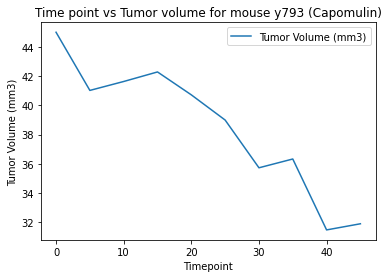

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_y793 = cleaned_df[["Timepoint", "Tumor Volume (mm3)"]][cleaned_df["Mouse ID"] == "y793"]
mouse_y793 = mouse_y793.set_index("Timepoint")
mouse_y793.plot.line(ylabel = "Tumor Volume (mm3)", title = "Time point vs Tumor volume for mouse y793 (Capomulin)")
plt.show()

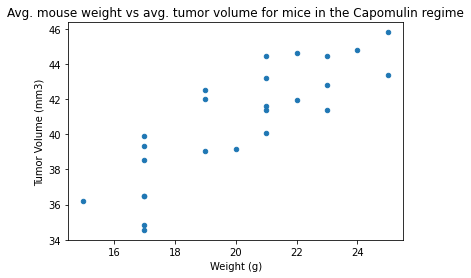

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mice = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]
capomulin_mice = capomulin_mice.groupby("Mouse ID").mean()
capomulin_mice.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)", title = "Avg. mouse weight vs avg. tumor volume for mice in the Capomulin regime")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


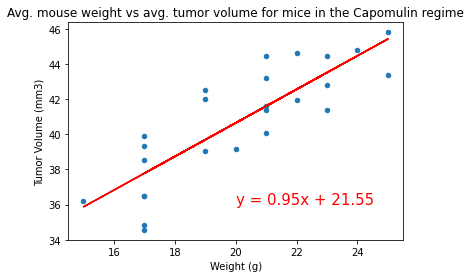

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# correlation = sts.pearsonr(capomulin_mice["Weight (g)"], capomulin_mice["Tumor Volume (mm3)"])

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(capomulin_mice["Weight (g)"], capomulin_mice["Tumor Volume (mm3)"])
rvalue
print(f"The correlation between both factors is {round(rvalue,2)}")

regress_values = capomulin_mice["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

capomulin_mice.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)", title = "Avg. mouse weight vs avg. tumor volume for mice in the Capomulin regime")
plt.plot(capomulin_mice["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.show()



In [20]:
# sts.linregress?